In [3]:
!pip install pandas matplotlib seaborn scikit-learn ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Fetch dataset using the ucimlrepo library
superconductivty_data = fetch_ucirepo(id=464) 
  
# Data (as pandas dataframes) 
X = superconductivty_data.data.features 
y = superconductivty_data.data.targets 

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and train the Random Forest Regressor model
# n_jobs=-1 uses all available CPU cores to speed up training.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Training the model...")
# We use .values.ravel() on y_train to ensure it's the correct format for the model
model.fit(X_train, y_train.values.ravel())
print("Training complete!")

# 4. Make predictions on the test data
predictions = model.predict(X_test)

# 5. Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Training the model...
Training complete!

Model Performance:
Mean Squared Error (MSE): 81.76
R-squared (R²) Score: 0.93


Fetching dataset...
Dataset loaded successfully.
Generating histogram...
Saved critical_temp_distribution.png
Generating scatter plot...
Saved scatterplot_feature_vs_target.png
Generating heatmap...
Saved correlation_heatmap.png

All plots have been generated and saved as PNG files.


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

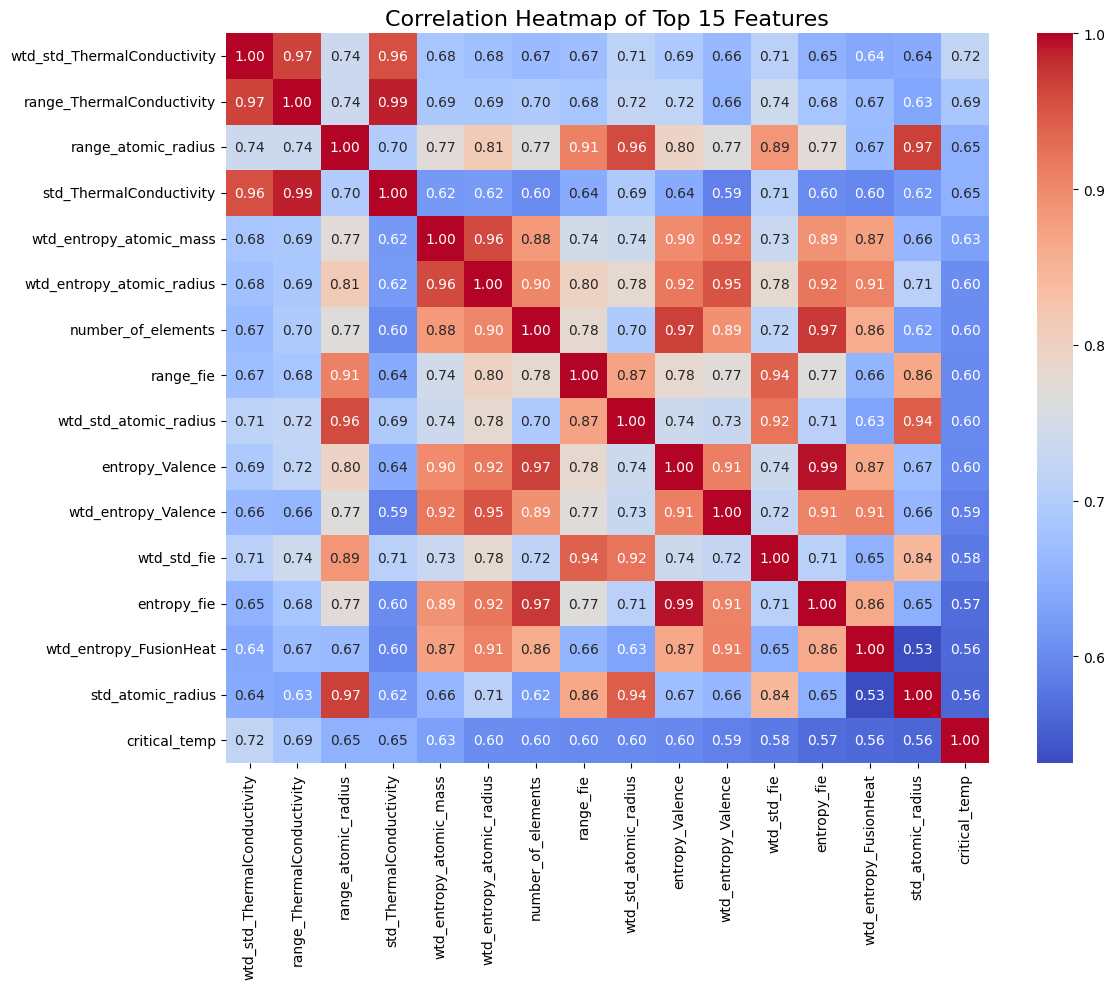

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# 1. Fetch dataset using the ucimlrepo library
print("Fetching dataset...")
superconductivty_data = fetch_ucirepo(id=464)

# Data (as pandas dataframes)
X = superconductivty_data.data.features
y = superconductivty_data.data.targets
print("Dataset loaded successfully.")

# --- Plot 1: Histogram of the Target Variable (critical_temp) ---
print("Generating histogram...")
plt.figure(figsize=(10, 6))
sns.histplot(data=y, x='critical_temp', kde=True, bins=50)
plt.title('Distribution of Critical Temperatures', fontsize=16)
plt.xlabel('Critical Temperature (K)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('critical_temp_distribution.png')
plt.clf() # Clear the figure for the next plot
print("Saved critical_temp_distribution.png")

# --- Plot 2: Scatter Plot of a Key Feature vs. Target ---
print("Generating scatter plot...")
feature_to_plot = 'mean_atomic_radius'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[feature_to_plot], y=y.squeeze(), alpha=0.3)
plt.title(f'{feature_to_plot} vs. Critical Temperature', fontsize=14)
plt.xlabel(feature_to_plot, fontsize=12)
plt.ylabel('Critical Temperature (K)', fontsize=12)
plt.savefig('scatterplot_feature_vs_target.png')
plt.clf() # Clear the figure for the next plot
print("Saved scatterplot_feature_vs_target.png")


# --- Plot 3: Correlation Heatmap of Top Features ---
print("Generating heatmap...")
df_full = pd.concat([X, y], axis=1)
correlations = df_full.corr()['critical_temp'].sort_values(ascending=False)
top_features = correlations[1:16].index
df_top = df_full[top_features.tolist() + ['critical_temp']]
top_corr_matrix = df_top.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 15 Features', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
print("Saved correlation_heatmap.png")

print("\nAll plots have been generated and saved as PNG files.")